In [31]:
#Necessary imports for the project
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import datetime
import time
import random

sns.set_style('darkgrid', {'axes.facecolor': "0.9"})


In [32]:
def generate_customer_profiles_table(n_customers, random_state = 1):
    """
    Function to generate a table with customer profiles
    """
    np.random.seed(random_state)
    
    customer_id_properties = []

    for customer_id in range(n_customers):
        y_customer_id = np.random.uniform(0, 100)
        x_customer_id = np.random.uniform(0, 100)

        mean_amount = np.random.uniform(5, 100) #Arbitarary (but sensible) value
        std_amount = mean_amount / 2

        mean_nb_tx_per_day = np.random.uniform(0, 4) #Arbitarary (but sensible) value

        customer_id_properties.append([customer_id,
                                       x_customer_id,y_customer_id,
                                       mean_amount,std_amount,
                                       mean_nb_tx_per_day])
    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['CUSTOMER_ID',
                                                                           'x_customer_id', 'y_customer_id',
                                                                           'mean_amount', 'std_amount',
                                                                           'mean_nb_tx_per_day'])
    return customer_profiles_table




In [33]:
#Example of 5 profiles
n_customers = 5
customer_table = generate_customer_profiles_table(n_customers=n_customers, random_state=2)
customer_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,2.592623,43.599490,57.217935,28.608968,1.741290
1,1,33.033482,42.036780,24.441620,12.220810,2.477084
2,2,26.682728,29.965467,64.007714,32.003857,2.116568
3,3,51.357812,13.457995,22.521787,11.260894,3.141341
4,4,49.423684,85.397529,85.423341,42.711671,0.318582


In [34]:
def generate_terminal_profiles_table(n_terminals, random_state = 0):
    """
    Function to generate a table with terminal profiles
    """
    np.random.seed(random_state)
    
    terminal_id_properties = []

    for terminal_id in range(n_terminals):
        y_terminal_id = np.random.uniform(0, 100)
        x_terminal_id = np.random.uniform(0, 100)



        terminal_id_properties.append([terminal_id,
                                       x_terminal_id,y_terminal_id])
    terminal_profiles_table = pd.DataFrame(terminal_id_properties, columns=['TERMINAL_ID',
                                                                           'x_terminal_id', 'y_terminal_id',])
    return terminal_profiles_table

In [35]:
n_terminals = 5

terminal_table = generate_terminal_profiles_table(n_terminals=n_terminals, random_state=3)
terminal_table


,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,70.814782,55.079790
1,1,51.082761,29.090474
2,2,89.629309,89.294695
3,3,20.724288,12.558531
4,4,44.080984,5.146720


In [36]:
def get_list_terminals_within_radius(customer_profile, x_y_terminals, radius):
    """
    Function to get the list of terminals within a certain radius
    """

    # Location (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id', 'y_customer_id']].values.astype(float)

    #Squared difference in coordinates between customer and terminal locations
    squared_diff_x_y = np.square(x_y_terminals - x_y_customer)

    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))

    # Get the indices of terminals which are at a distance less than radius
    available_terminals = list(np.where(dist_x_y<radius)[0])
    

    
    return available_terminals

In [37]:
x_y_terminals = terminal_table[['x_terminal_id','y_terminal_id']].values.astype(float)

get_list_terminals_within_radius(customer_table.iloc[4], x_y_terminals, 50)



[0, 2]

In [38]:
terminal_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,70.814782,55.079790
1,1,51.082761,29.090474
2,2,89.629309,89.294695
3,3,20.724288,12.558531
4,4,44.080984,5.146720


Text(0, 0.5, 'y_terminal_id')

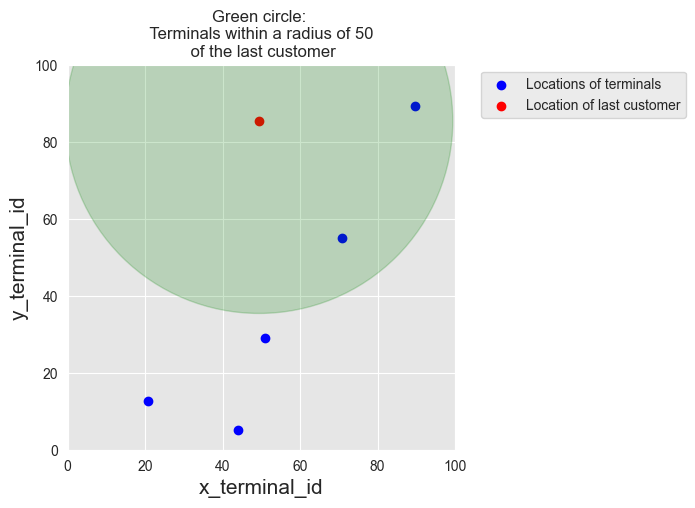

In [39]:

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(terminal_table.x_terminal_id.values, 
           terminal_table.y_terminal_id.values, 
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer
customer_id=4
ax.scatter(customer_table.iloc[customer_id].x_customer_id, 
           customer_table.iloc[customer_id].y_customer_id, 
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_table.iloc[customer_id].x_customer_id,
                   customer_table.iloc[customer_id].y_customer_id), radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
    
ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)
    


In [40]:
customer_table['available_terminals'] = customer_table.apply(lambda x: get_list_terminals_within_radius(x, x_y_terminals, 50), axis=1)
customer_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,2.592623,43.599490,57.217935,28.608968,1.741290,[3]
1,1,33.033482,42.036780,24.441620,12.220810,2.477084,"[0, 1, 3, 4]"
2,2,26.682728,29.965467,64.007714,32.003857,2.116568,"[1, 3, 4]"
3,3,51.357812,13.457995,22.521787,11.260894,3.141341,"[0, 1, 3, 4]"
4,4,49.423684,85.397529,85.423341,42.711671,0.318582,"[0, 2]"


In [41]:
#Generating transactions on a customer profile 
def generating_transactions_table(customer_profile, start_date = "2024-15-08", nb_days = 100):
    
    customer_transactions = []

    random.seed(int(customer_profile.CUSTOMER_ID))
    np.random.seed(int(customer_profile.CUSTOMER_ID))

    #for all days
    for day in range(nb_days):
        #Number of transactions for that day
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)

        if nb_tx > 0:
            for tx in range(nb_tx):
               time_tx = int(np.random.normal(86400 / 2, 20000))
               if(time_tx > 0) and time_tx < 86400:
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)

                    if (amount < 0 ):
                        amount = np.random.uniform(0, customer_profile.mean_amount * 2)
                    amount = np.round(amount, decimals= 2)

                    if(len(customer_profile.available_terminals) > 0):
                        terminal_id = random.choice(customer_profile.available_terminals)

                        customer_transactions.append([time_tx+day*86400, day,
                                                      customer_profile.CUSTOMER_ID,
                                                      terminal_id, amount])
    customer_transactions = pd.DataFrame(customer_transactions, columns=['TX_TIME_SECONDS', 'TX_TIME_DAYS', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT'])

    if len(customer_transactions)>0:
        customer_transactions['TX_DATETIME'] = pd.to_datetime(customer_transactions["TX_TIME_SECONDS"], unit='s', origin = start_date)
        customer_transactions= customer_transactions[['TX_DATETIME','CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT','TX_TIME_SECONDS', 'TX_TIME_DAYS']]
    return customer_transactions
                        

In [42]:
transactions_of_customer_1 = generating_transactions_table(customer_table.iloc[2], start_date="2024-08-15", nb_days=5)

In [43]:
type(transactions_of_customer_1.TX_DATETIME.values[0])

numpy.datetime64

In [44]:
transactions_df = customer_table.groupby('CUSTOMER_ID').apply(lambda x: generating_transactions_table(x.iloc[0], start_date="2024-08-15", nb_days=15)).reset_index(drop=True)


/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_11863/1131183762.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions_df = customer_table.groupby('CUSTOMER_ID').apply(lambda x: generating_transactions_table(x.iloc[0], start_date="2024-08-15", nb_days=15)).reset_index(drop=True)


In [45]:
def generate_dataset(n_customers = 10000, n_terminals = 100000, n_days = 90, start_day = '2024-08-16', radius = 5):
    start_time = time.time()
    customer_profile_table = generate_customer_profiles_table(n_customers, random_state = 0)
    print('Time to generate customer profile table: {} seconds'.format(time.time()-start_time))

    start_time = time.time()
    terminal_profile_table = generate_terminal_profiles_table(n_terminals, random_state = 1)
    print('Time to generate terminal profile table: {} seconds'.format(time.time()-start_time))

    start_time = time.time()
    x_y_terminals = terminal_profile_table[['x_terminal_id','y_terminal_id']].values.astype(float)
    customer_profile_table['available_terminals'] = customer_profile_table.apply(lambda x: get_list_terminals_within_radius(x, x_y_terminals, radius), axis=1)
    customer_profile_table['nb_terminals'] = customer_profile_table.available_terminals.apply(len)
    print('Customer Profile Table Columns: ', customer_profile_table.columns)
    print('Time to compute available terminals for each customer: {} seconds'.format(time.time()-start_time))

    start_time = time.time()
    transactions_df = customer_profile_table.groupby('CUSTOMER_ID').apply(lambda x : generating_transactions_table(x.iloc[0], start_date=start_day,nb_days=n_days)).reset_index(drop=True)
    print('Time to generate transactions: {} seconds'.format(time.time()-start_time))
    # Sort transactions chronologically
    transactions_df = transactions_df.sort_values('TX_DATETIME')
    # Reset indices, starting from 0
    transactions_df.reset_index(drop=True, inplace=True)

    # TRANSACTION_ID are the dataframe indices, starting from 0
    transactions_df['TRANSACTION_ID'] = transactions_df.index
    # Reorder columns
    transactions_df = transactions_df[['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS']]
    
    

    return customer_profile_table, terminal_profile_table, transactions_df

    


In [46]:
(customer_profile_table, terminal_profile_table, transactions_df) = generate_dataset(n_customers = 5000, 
                                                                                     n_terminals = 10000, 
                                                                                     n_days = 168, 
                                                                                     start_day = "2024-08-16", 
                                                                                     radius = 5)
# 16 Aug 2024 to 31 Jan 2025


Time to generate customer profile table: 0.026035070419311523 seconds
Time to generate terminal profile table: 0.025997161865234375 seconds
Customer Profile Table Columns:  Index(['CUSTOMER_ID', 'x_customer_id', 'y_customer_id', 'mean_amount',
       'std_amount', 'mean_nb_tx_per_day', 'available_terminals',
       'nb_terminals'],
      dtype='object')
Time to compute available terminals for each customer: 0.5313668251037598 seconds


/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_11863/2875937976.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transactions_df = customer_profile_table.groupby('CUSTOMER_ID').apply(lambda x : generating_transactions_table(x.iloc[0], start_date=start_day,nb_days=n_days)).reset_index(drop=True)
/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_11863/2875937976.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions_d

Time to generate transactions: 29.51513695716858 seconds


In [47]:
print(transactions_df.shape)
transactions_df

(1610210, 7)


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,0,2024-08-16 00:00:31,596,3156,57.16,31,0
1,1,2024-08-16 00:02:10,4961,3412,81.51,130,0
2,2,2024-08-16 00:07:56,2,1365,146.00,476,0
3,3,2024-08-16 00:09:29,4128,8737,64.49,569,0
4,4,2024-08-16 00:10:34,927,9906,50.99,634,0
...,...,...,...,...,...,...,...
1610205,1610205,2025-01-30 23:55:00,1774,6994,21.45,14514900,167
1610206,1610206,2025-01-30 23:55:17,4161,9595,23.42,14514917,167
1610207,1610207,2025-01-30 23:56:14,3179,2,46.73,14514974,167
1610208,1610208,2025-01-30 23:56:27,4399,3644,77.21,14514987,167


In [48]:
customer_profile_table[customer_profile_table.CUSTOMER_ID == 0]

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,0,71.518937,54.88135,62.262521,31.13126,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",78


[Text(0.5, 0, 'Time (days)'), Text(0, 0.5, 'Number of transactions')]

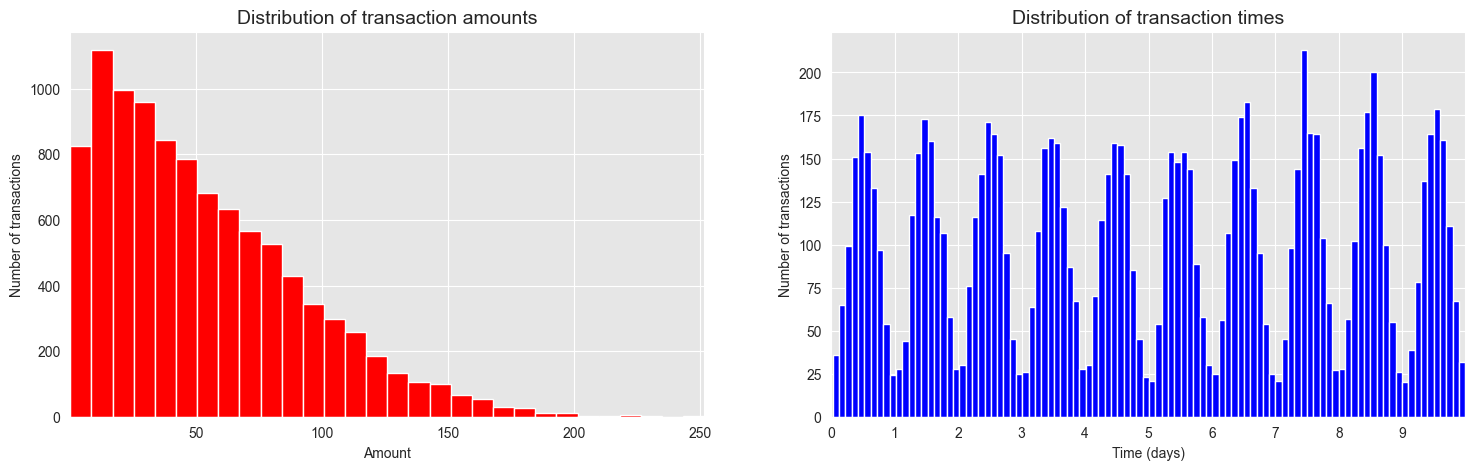

In [49]:
distribution_amount_times_fig, ax = plt.subplots(1,2, figsize=(18,5))

amount_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_AMOUNT'].sample(n=10000).values
time_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_TIME_SECONDS'].sample(n=10000).values

ax[0].hist(amount_val, bins=30, color='r')
ax[0].set_title('Distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "Amount", ylabel="Number of transactions")

# We divide the time variables by 86400 to transform seconds to days in the plot
ax[1].hist(time_val / 86400, bins = 100,color = 'b', )
ax[1].set_title('Distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "Time (days)", ylabel="Number of transactions")



In [50]:
#Seneryo 1: 220 nin üstündeki amountlar fraudelent olarak işaretlenir.
#Gerçek hayatta pek mümkün olmayan bir seneryo olsa da bu seneryo fraud detection modelinin yüksek miktarlı transactionları yakalayıp yakalayamadığını test etmek için kullanılabilir.

#Seneryo 2: Her gün 2 terminal seçilir ve bu terminallerdeki transactionlar sonraki 28 gün boyunca fraudelent olarak işaretlenir.
#Bu seneryo bir terminalin bir suç için kullanıldığını simüle eder, phising gibi. 
#Bu işlemin yakalanması terminaldeki fradulent transactionların sayısını takip ederek terminallere featurelar eklenmesiyle mümkün olabilir.

#Seneryo 3: Her gün 3 customer seçilir. Sonraki 14 gün içerisindeki transactionlarının 1/3 ünün amountları 5 ile çarpılarak fraudelent olarak işaretlenir.
#Bu seneryo kartın olmadığı dolandırıcılık seneryosunu simüle eder.
#Customer harcama yapmaya devam eder aynı zamanda yüksek miktarlı transactionlar dolandırıcı tarafından kendi kazancını maksimize etmeye çalışır.
#Bu işlemin yakalanması customerın harcama alışkanlıklarının takip edilmesiyle mümkün olabilir.
#Bu seneryo aynı zamanda fraud detection modelinin customerın harcama alışkanlıklarını öğrenmesi için bir fırsat olabilir.

def add_frauds(customer_profile_table, terminal_profile_table, transactions_df):
    # By default all the transactions are genuine
    transactions_df['TX_FRAUD'] = 0
    transactions_df['TX_FRAUD_SCENERIO'] = 0

    #Scenerio 1:
    transactions_df.loc[transactions_df.TX_AMOUNT > 220, 'TX_FRAUD'] = 1
    transactions_df.loc[transactions_df.TX_AMOUNT > 220, 'TX_FRAUD_SCENERIO'] = 1
    nb_frauds_scenerio_1 = transactions_df.TX_FRAUD.sum()
    print('Number of frauds in scenerio 1: ', str(nb_frauds_scenerio_1))

    #Scenerio 2:
    for day in range(transactions_df.TX_TIME_DAYS.max()):
        compromised_terminals = terminal_profile_table.TERMINAL_ID.sample(n=2, random_state=day)
        compromised_transactions = transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                    (transactions_df.TX_TIME_DAYS<day+28) & 
                                                    (transactions_df.TERMINAL_ID.isin(compromised_terminals))]
        transactions_df.loc[compromised_transactions.index, 'TX_FRAUD'] = 1
        transactions_df.loc[compromised_transactions.index, 'TX_FRAUD_SCENERIO'] = 2

    nb_frauds_scenerio_2 = transactions_df.TX_FRAUD.sum() - nb_frauds_scenerio_1
    print('Number of frauds in scenerio 2: ', str(nb_frauds_scenerio_2))

    #Scenerio 3:
    for day in range(transactions_df.TX_TIME_DAYS.max()):
        compromised_customers = customer_profile_table.CUSTOMER_ID.sample(n= 3, random_state=day)
        compromised_transactions = transactions_df[(transactions_df.TX_TIME_DAYS >= day) & 
                                                   (transactions_df.TX_TIME_DAYS < day+14) & 
                                                   (transactions_df.CUSTOMER_ID.isin(compromised_customers))] 
        
        random.seed(day)

        compromised_transactions = compromised_transactions.sample(frac=1/3, random_state=day)

        compromised_transactions['TX_AMOUNT'] = compromised_transactions['TX_AMOUNT'] * 5
        transactions_df.loc[compromised_transactions.index, 'TX_AMOUNT'] = compromised_transactions['TX_AMOUNT']
        transactions_df.loc[compromised_transactions.index, 'TX_FRAUD'] = 1
        transactions_df.loc[compromised_transactions.index, 'TX_FRAUD_SCENERIO'] = 3



    nb_frauds_scenerio_3 = transactions_df.TX_FRAUD.sum() - nb_frauds_scenerio_2 - nb_frauds_scenerio_1
    print('Number of frauds in scenerio 3: ', str(nb_frauds_scenerio_3))

    return transactions_df


        



In [51]:
%time transactions_df = add_frauds(customer_profile_table, terminal_profile_table, transactions_df)


Number of frauds in scenerio 1:  902
Number of frauds in scenerio 2:  8278
Number of frauds in scenerio 3:  4284
CPU times: user 42.1 s, sys: 706 ms, total: 42.8 s
Wall time: 42.8 s


In [52]:
#Total fraudelent transactions
transactions_df.TX_FRAUD.sum()

13464

In [53]:
#Percentage of Fraudelent transactions // 0.8 %
transactions_df.TX_FRAUD.mean()

0.008361642270262886

In [54]:
transactions_df[transactions_df.TX_FRAUD_SCENERIO == 1].shape

(895, 9)

In [55]:
transactions_df[transactions_df.TX_FRAUD_SCENERIO == 2].shape

(8257, 9)

In [56]:
transactions_df[transactions_df.TX_FRAUD_SCENERIO == 3].shape

(4312, 9)

In [57]:
def get_stats(transactions_df):
    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraud_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    #Number of fraudulent cards per day
    nb_fraudcard_per_day=transactions_df[transactions_df['TX_FRAUD']>0].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()
    
    return (nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)

(nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)=get_stats(transactions_df)

n_days=len(nb_tx_per_day)
tx_stats=pd.DataFrame({"value":pd.concat([nb_tx_per_day/50,nb_fraud_per_day,nb_fraudcard_per_day])})
tx_stats['stat_type']=["nb_tx_per_day"]*n_days+["nb_fraud_per_day"]*n_days+["nb_fraudcard_per_day"]*n_days
tx_stats=tx_stats.reset_index()

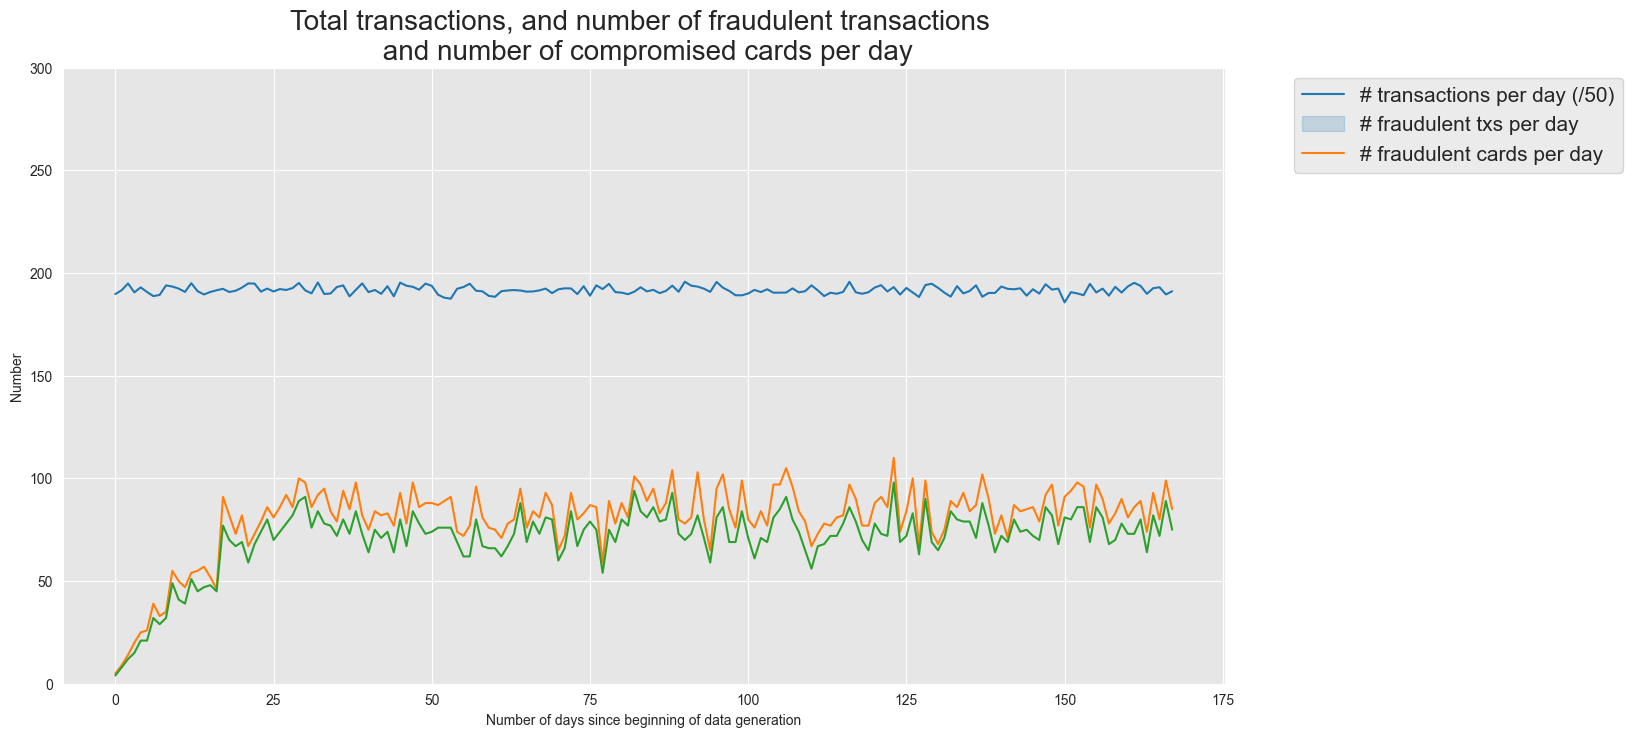

In [58]:
fraud_and_transactions_stats_fig = plt.gcf()

fraud_and_transactions_stats_fig.set_size_inches(15, 8)

sns_plot = sns.lineplot(x="TX_TIME_DAYS", y="value", data=tx_stats, hue="stat_type", hue_order=["nb_tx_per_day","nb_fraud_per_day","nb_fraudcard_per_day"], legend=False)

sns_plot.set_title('Total transactions, and number of fraudulent transactions \n and number of compromised cards per day', fontsize=20)
sns_plot.set(xlabel = "Number of days since beginning of data generation", ylabel="Number")

sns_plot.set_ylim([0,300])

labels_legend = ["# transactions per day (/50)", "# fraudulent txs per day", "# fraudulent cards per day"]

sns_plot.legend(loc='upper left', labels=labels_legend,bbox_to_anchor=(1.05, 1), fontsize=15)

In [59]:
#Saving the dataset
!pip install pyarrow
transactions_df.to_parquet('transactions.parquet', index=False)

